# BUMPER-TO-BUMPER!🚗💥 
## A DIVE INTO CHICAGO ACCIDENTS DATASET

<img src="image.jpg" width="500">


# PROJECT SUMMARY

## 1. 👔BUSINESS UNDERSTANDING

According to this [article](https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries) by the World Health Organization Published on 13th December 2023, approximately the lives of  1.19 million people are cut short every year as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability.

In Chicago, thousands of traffic crashes occur every year, resulting in significant human, social, and economic costs. City authorities and transportation planners aim to reduce crash frequency and severity by identifying the key factors contributing to these incidents  such as driver behavior, road conditions, weather, lighting, and time of day.

The WHO  projects that without more significant intervention, road traffic crashes will become the fifth leading cause of death globally by 2030. By leveraging these tools, CDOT can more accurately identify high-risk conditions, problematic locations, and behavioral trends, enabling targeted interventions. This data-driven approach will support the design of more effective traffic safety policies, infrastructure improvements, and public awareness campaigns aimed at reducing traffic-related injuries and fatalities in Chicago.

## 2. ✍️BUSINESS PROBLEM
In the city of Chicago, the number of reported cases of accidents has increased rapidly over the years. This pattern has raised concerns to the Vehicle Safety Board whose interest is reducing traffic accidents in Chicago. The City of Chicago’s Department of Transportation (CDOT) has collected detailed data on reported vehicle crashes, including information on the vehicles involved, drivers and passengers, and environmental conditions at the time of the accident. 

By effectively predicting the main cause behind crashes, the city can strategically focus its resources and efforts to reduce traffic incidents.This data-driven approach empowers the city to maximize impact on traffic safety by addressing root causes and concentrating efforts where they matter most.

# 3. 📋OBJECTIVES

## 3.1 Main objective
1. Build a model that can predict the likelihood of accidents based on features.

## 3.2 Specific objectives
1. To determine how various factors e.g Weather conditions contribute  to road accidents.
2. To analyze the relationship and patterns between time of day, day of the week and month of the year with Road accidents.
3. To determine the most dangerous Locations.
4. To establish the relationship between speed limit and fatality of injury.
5. To identify conditions that most contribute to fatal outcomes such as crash type and the condition of traffic control devices.

## 3.3 🔎Research Questions
1. What factors contribute to road accidents?
2. How do crash frequencies vary across time (hour of day, day of week, month, or season)?
3. What are the most dangerous locations?
4. How does speeding correlate with crash severity?
5. What are the effects of natural conditions to accidents?

## 3.3 👍Metric of success

# 4. 📊DATA UNDERSTANDING
This data was derived from the [Chicago Data Portal](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data). This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. The data has approximately 993k rows and 48 columns. After cleaning and dropping irrelevant columns, this analysis will be using the following columns:

* `crash_date` – The date and time when the crash occurred.

* `posted_speed_limit` – The speed limit (in mph) posted at the crash location.

* `traffic_control_device` – The type of traffic control device present at the crash site (e.g., stop sign, traffic signal).

* `device_condition` – The condition of the traffic control device at the time of the crash.

* `weather_condition` – The weather condition during the crash (e.g., clear, rain, snow).

* `lighting_condition` – The lighting condition at the time of the crash (e.g., daylight, dark – no streetlights).

* `first_crash_type` – The type of initial impact or collision in the crash.

* `trafficway_type` – The design or type of roadway where the crash occurred (e.g., one-way, divided highway).

* `alignment` – The road alignment where the crash occurred (e.g., straight, curve).

* `road_defect` – Any reported defect in the road that may have contributed to the crash.

* `crash_type` – A general classification of the crash (e.g., rear-end, sideswipe).

* `date_police_notified` – The date when the police were notified about the crash.

* `prim_contributory_cause` – The primary cause determined to have contributed to the crash.

* `sec_contributory_cause` – A secondary factor contributing to the crash.

* `street_no` – The street number where the crash occurred.

* `street_direction` – The compass direction (e.g., N, S, E, W) of the street where the crash occurred.

* `street_name` – The name of the street where the crash happened.

* `num_units` – The number of vehicles or units involved in the crash.

* `most_severe_injury` – The most serious injury outcome from the crash (e.g., fatal, no injury).

* `injuries_total` – The total number of injuries reported in the crash.

* `latitude` – The geographic latitude coordinate of the crash location.

* `longitude` – The geographic longitude coordinate of the crash location.

* `location` – A combined geographic point (latitude and longitude) representing the crash site.

## 4.1 🚧Data Limitation

Categorical Complexity

Many categorical columns (e.g., TRAFFIC_CONTROL_DEVICE, FIRST_CRASH_TYPE, etc.) have many levels or inconsistent labels (like "UNKNOWN", "UNREPORTED", "OTHER").

This increases data sparsity and may require encoding techniques (like one-hot encoding or target encoding) that can inflate feature space.

Missing or Incomplete Data. Some records have missing values in key columns such as WEATHER_CONDITION, LIGHTING_CONDITION, ROADWAY_SURFACE_COND, INJURIES_TOTAL, INJURIES_FATAL, etc.



## 4.2 Loading a dataset

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



In [2]:
df= pd.read_csv("traffic_crashes.csv")
df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,10/12/2025 02:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,2.0,0.0,2,1,10,41.864686,-87.628601,POINT (-87.628600775248 41.864686205128)
1,10/12/2025 01:30:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,1.0,0.0,1,1,10,41.778137,-87.751688,POINT (-87.751688421991 41.778136527292)
2,10/12/2025 01:15:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,2.0,0.0,1,1,10,41.900585,-87.632986,POINT (-87.632986070025 41.900584800211)
3,10/12/2025 01:15:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,1.0,0.0,1,1,10,41.831062,-87.630739,POINT (-87.630739346453 41.831062009276)
4,10/12/2025 01:11:00 AM,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,2.0,0.0,1,1,10,41.774252,-87.644497,POINT (-87.644496549933 41.774252148861)


In [3]:
(df.isnull().sum()/len(df))*100

CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
REPORT_TYPE                      3.286638
CRASH_TYPE                       0.000000
DAMAGE                           0.000000
DATE_POLICE_NOTIFIED             0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0.000000
STREET_NO                        0.000000
STREET_DIRECTION                 0.000403
STREET_NAME                      0.000101
BEAT_OF_OCCURRENCE               0.000504
NUM_UNITS                        0.000000
MOST_SEVERE_INJURY               0.218014
INJURIES_TOTAL                   0

In [4]:
columns_to_drop =[
    "INJURIES_FATAL","INJURIES_INCAPACITATING",
    "INJURIES_NON_INCAPACITATING","INJURIES_REPORTED_NOT_EVIDENT",
    "INJURIES_NO_INDICATION","INJURIES_UNKNOWN","REPORT_TYPE",
     "ROADWAY_SURFACE_COND","BEAT_OF_OCCURRENCE"]
df = df.drop(columns_to_drop,axis =1)

We also decided to drop missing values in our `REPORT_TYPE`,`STREET_DIRECTION`,`STREET_NAME`columns.

In [5]:
df = df.dropna(subset =["MOST_SEVERE_INJURY","INJURIES_TOTAL","STREET_DIRECTION","STREET_NAME","LATITUDE","LONGITUDE","LOCATION"])

In [6]:
df.isnull().sum()

CRASH_DATE                 0
POSTED_SPEED_LIMIT         0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
DATE_POLICE_NOTIFIED       0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
STREET_NO                  0
STREET_DIRECTION           0
STREET_NAME                0
NUM_UNITS                  0
MOST_SEVERE_INJURY         0
INJURIES_TOTAL             0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LATITUDE                   0
LONGITUDE                  0
LOCATION                   0
dtype: int64

In [7]:
df.shape

(982961, 27)

Let's change the name of all the columns to lowercase for usability.

In [8]:
df.columns = df.columns.str.lower()

From below you can tell our `DAMAGE` column has "$" "," and is an object but it should be a integer so let's get rid of any whitesapaces and other inputs and convert it to int datatype

In [9]:
df["damage"].value_counts()

damage
OVER $1,500      627815
$501 - $1,500    246985
$500 OR LESS     108161
Name: count, dtype: int64

In [10]:
# check the datatype of the other columns
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 982961 entries, 0 to 992594
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crash_date               982961 non-null  object 
 1   posted_speed_limit       982961 non-null  int64  
 2   traffic_control_device   982961 non-null  object 
 3   device_condition         982961 non-null  object 
 4   weather_condition        982961 non-null  object 
 5   lighting_condition       982961 non-null  object 
 6   first_crash_type         982961 non-null  object 
 7   trafficway_type          982961 non-null  object 
 8   alignment                982961 non-null  object 
 9   road_defect              982961 non-null  object 
 10  crash_type               982961 non-null  object 
 11  damage                   982961 non-null  object 
 12  date_police_notified     982961 non-null  object 
 13  prim_contributory_cause  982961 non-null  object 
 14  sec_contr

In [11]:
df.isnull().sum()

crash_date                 0
posted_speed_limit         0
traffic_control_device     0
device_condition           0
weather_condition          0
lighting_condition         0
first_crash_type           0
trafficway_type            0
alignment                  0
road_defect                0
crash_type                 0
damage                     0
date_police_notified       0
prim_contributory_cause    0
sec_contributory_cause     0
street_no                  0
street_direction           0
street_name                0
num_units                  0
most_severe_injury         0
injuries_total             0
crash_hour                 0
crash_day_of_week          0
crash_month                0
latitude                   0
longitude                  0
location                   0
dtype: int64

Let's change the datatype of `crash_date` to datetime.

In [12]:
df['crash_date'] = pd.to_datetime(df['crash_date'])

Since `crash_hour`,`crash_day_of_week` and `crash_month` have the same information as `crash_date` it is advisable to drop them.

In [13]:
columns =["crash_hour","crash_day_of_week","crash_month"]
df = df.drop(columns,axis =1)

Let's get rid of all whitespaces in every column.

In [14]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

In [15]:
df.head(7)

,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,road_defect,...,sec_contributory_cause,street_no,street_direction,street_name,num_units,most_severe_injury,injuries_total,latitude,longitude,location
0,2025-10-12 02:15:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,NO DEFECTS,...,NOT APPLICABLE,1336,S,PLYMOUTH CT,2,NO INDICATION OF INJURY,0.0,41.864686,-87.628601,POINT (-87.628600775248 41.864686205128)
1,2025-10-12 01:30:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,NO DEFECTS,...,UNABLE TO DETERMINE,5153,W,63RD ST,1,NO INDICATION OF INJURY,0.0,41.778137,-87.751688,POINT (-87.751688421991 41.778136527292)
2,2025-10-12 01:15:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,...,DISTRACTION - FROM INSIDE VEHICLE,1000,N,LA SALLE DR,2,NO INDICATION OF INJURY,0.0,41.900585,-87.632986,POINT (-87.632986070025 41.900584800211)
3,2025-10-12 01:15:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,NO DEFECTS,...,NOT APPLICABLE,142,W,35TH ST,1,NO INDICATION OF INJURY,0.0,41.831062,-87.630739,POINT (-87.630739346453 41.831062009276)
4,2025-10-12 01:11:00,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,NO DEFECTS,...,IMPROPER TURNING/NO SIGNAL,6601,S,HALSTED ST,2,NO INDICATION OF INJURY,0.0,41.774252,-87.644497,POINT (-87.644496549933 41.774252148861)
5,2025-10-12 00:56:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,NO DEFECTS,...,NOT APPLICABLE,1809,W,NORTH AVE,3,NO INDICATION OF INJURY,0.0,41.910445,-87.672973,POINT (-87.672972542585 41.910445412955)
6,2025-10-12 00:25:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,NO DEFECTS,...,NOT APPLICABLE,5500,S,PULASKI RD,2,NO INDICATION OF INJURY,0.0,41.793155,-87.723304,POINT (-87.723303764642 41.793155060731)


In [16]:
df.describe()

,crash_date,posted_speed_limit,street_no,num_units,injuries_total,latitude,longitude
count,982961,982961.000000,982961.000000,982961.000000,982961.000000,982961.000000,982961.000000
mean,2021-03-18 16:11:49.265372928,28.443802,3692.362053,2.036498,0.197757,41.855239,-87.673245
min,2013-03-03 16:48:00,0.000000,1.000000,1.000000,0.000000,0.000000,-87.939678
25%,2018-12-01 22:45:00,30.000000,1300.000000,2.000000,0.000000,41.784067,-87.721817
50%,2021-04-21 04:56:00,30.000000,3202.000000,2.000000,0.000000,41.875174,-87.674364
75%,2023-07-20 14:55:00,30.000000,5556.000000,2.000000,0.000000,41.924769,-87.633797
max,2025-10-12 02:15:00,99.000000,13799.000000,18.000000,21.000000,42.022780,0.000000
std,NaN,6.010941,2829.566788,0.448432,0.577275,0.351103,0.715405


# 5. EXPLANATORY DATA ANALYSIS

We will carry out an analysis of the dataset to evaluate feature distributions, assess relationships between features and the target variables, identify anomalies, outliers or data quality issues. This helps inform feature engineering decisions and guides the selection of appropriate modeling techniques.

## 5.1 UNIVARIATE ANALYIS

### 5.1.1 `Injury Severity` Distribution

Let's look at the distribution of counts for rows in the **most_severe_injury** column to understand the severity of most injuries.

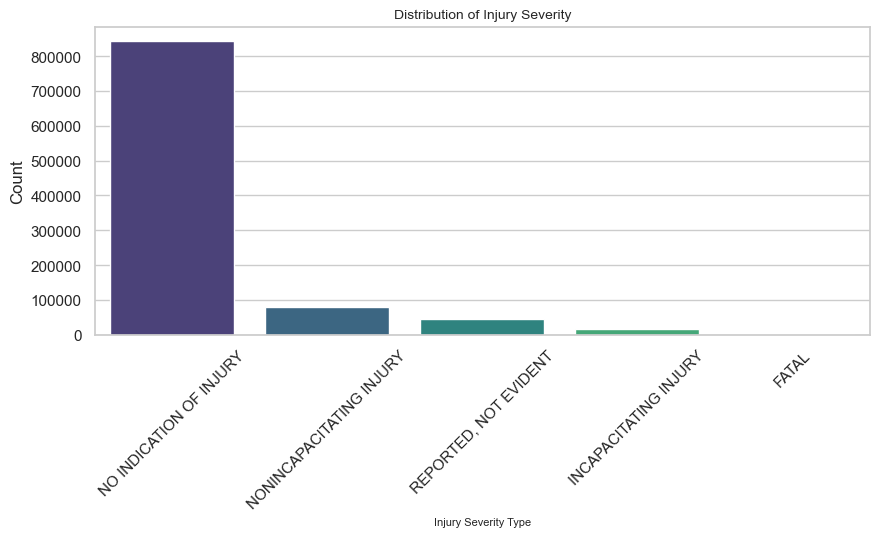

In [17]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='most_severe_injury', palette='viridis')

# Add labels
plt.title("Distribution of Injury Severity", fontsize=10)
plt.xlabel("Injury Severity Type", fontsize=8)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  
plt.show()

From the countplot, most crashes have "No indication of injury" meaning no one was hurt, and even fewer have non-incapacitating injuries. The fewest have incapacitating injuries while fatal injuries are rare. In summary, most accidents cause little to none injury and very few were seriously harmed.

### 5.1.2 `Top 5 Contributory Causes of Crashes` Distribution

We will look at the top 5 most common causes of crashes and how many crashes have occured due to each particular reason

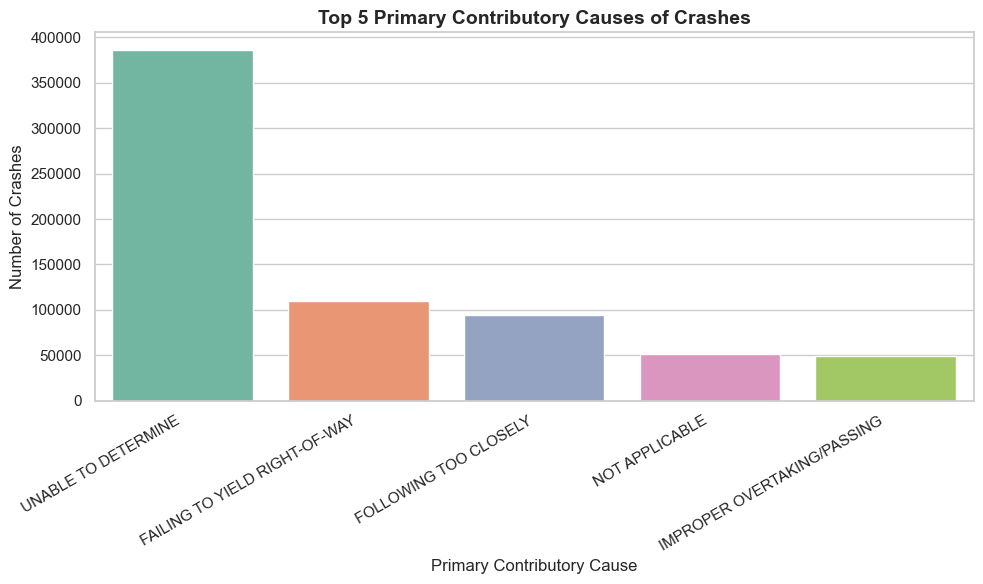

In [18]:
# Get top 5 contributory causes
top_5 = df['prim_contributory_cause'].value_counts().nlargest(5).index

# Filter dataset to include only top 5
df_top5 = df[df['prim_contributory_cause'].isin(top_5)]

# Create vertical countplot
plt.figure(figsize=(10,6))
sns.countplot(
    x='prim_contributory_cause',
    data=df_top5,
    order=top_5,
    palette='Set2'   
)

plt.title('Top 5 Primary Contributory Causes of Crashes', fontsize=14, weight='bold')
plt.xlabel('Primary Contributory Cause', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.xticks(rotation=30, ha='right')  
plt.tight_layout()
plt.show()

As we can see in the countplot, more than 350,000 crashes were left undetermined this may suggest data limitations. Another major contributor is "Failing to yield Right-of-Way" which is often linked to driver error or violation of rules. "Following  Too Closely" and "Improper Passing" have similar number of crashes and also occur during congested traffic or distracted driving. Lastly some causes are "Not Applicable" where the cases were not clearly recorded. The data is heavily skewed and does not give us clear reasons for the cause of the most common crashes.

### 5.1.3 `Yearly Accident Trends`

This graph shows how number of accidents per year changes over time.


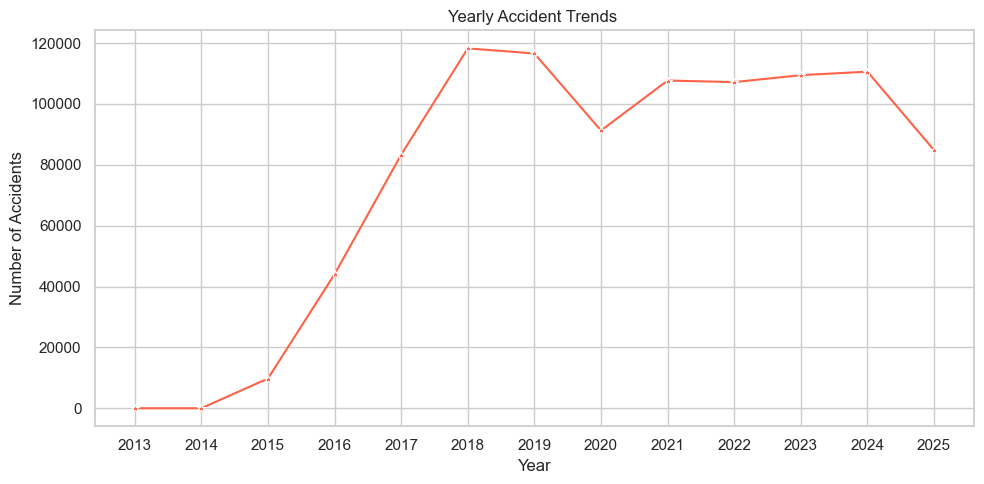

In [19]:
# Extract the year
df['year'] = df['crash_date'].dt.year

# Count number of accidents per year
yearly_counts = df.groupby('year').size().reset_index(name='count')
sns.set_theme(style='whitegrid')

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_counts, x='year', y='count', marker='*', color='tomato')

# Customize
plt.title('Yearly Accident Trends ')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(yearly_counts['year'])  
plt.tight_layout()
plt.show()

In 2013 close to none accidents occured, while in 2018 the highest accident count was recorded. This may suggest that there were fewer number of cars in 2013. In 2020 there was a sudden drop likely due to policy changes and better traffic security. Finally, in 2025 there was a decline which suggests improvement in safety measures.

## 5.2 Bivariate Analysis

### 5.2.1 `Categorical Features vs Primary Contributory Cause`

Let's compare different categorical variables to the top 5 primary contributary causes using countplots. 

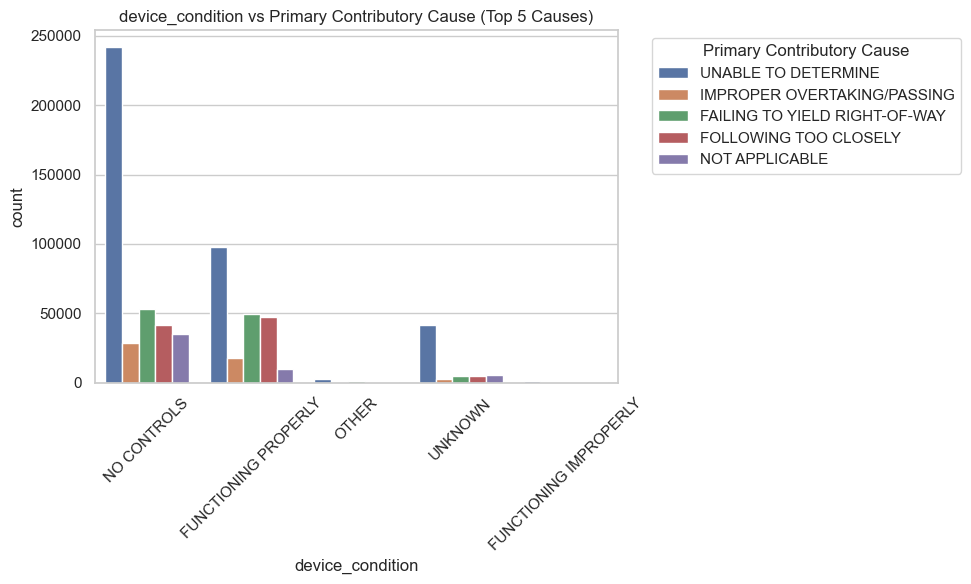

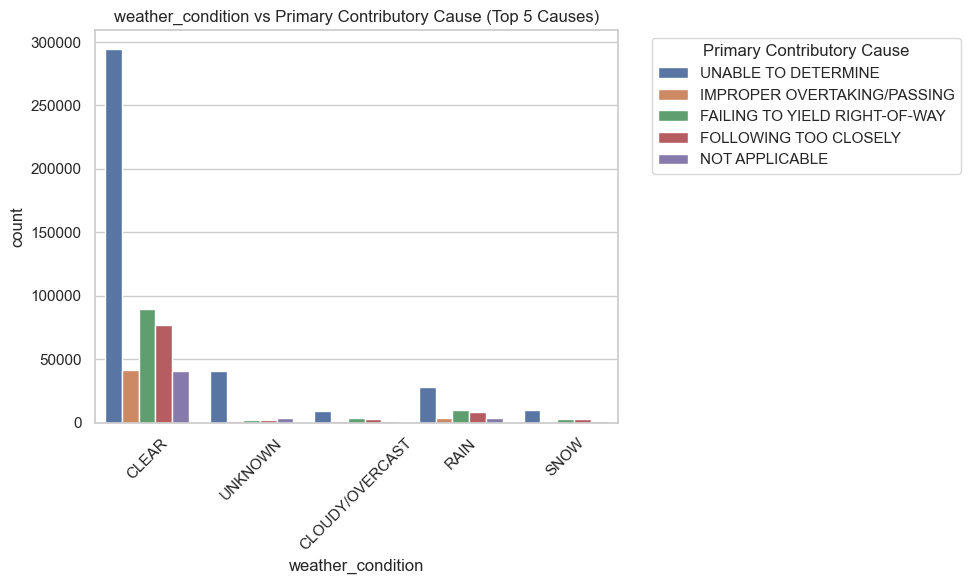

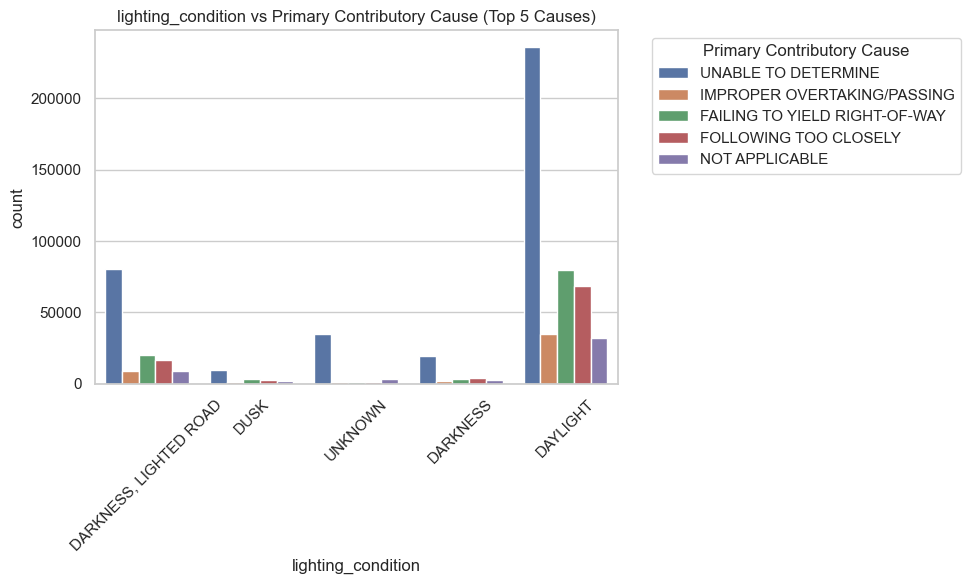

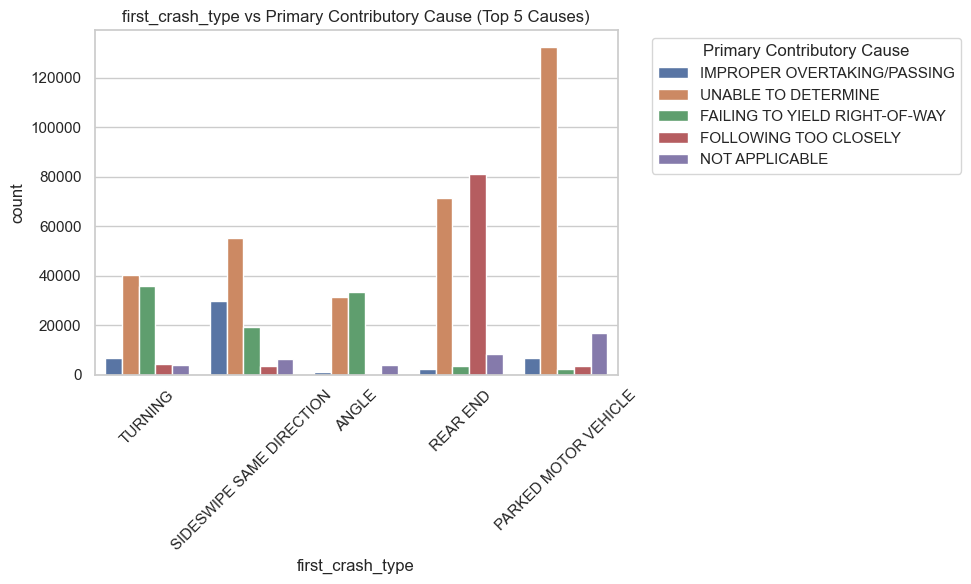

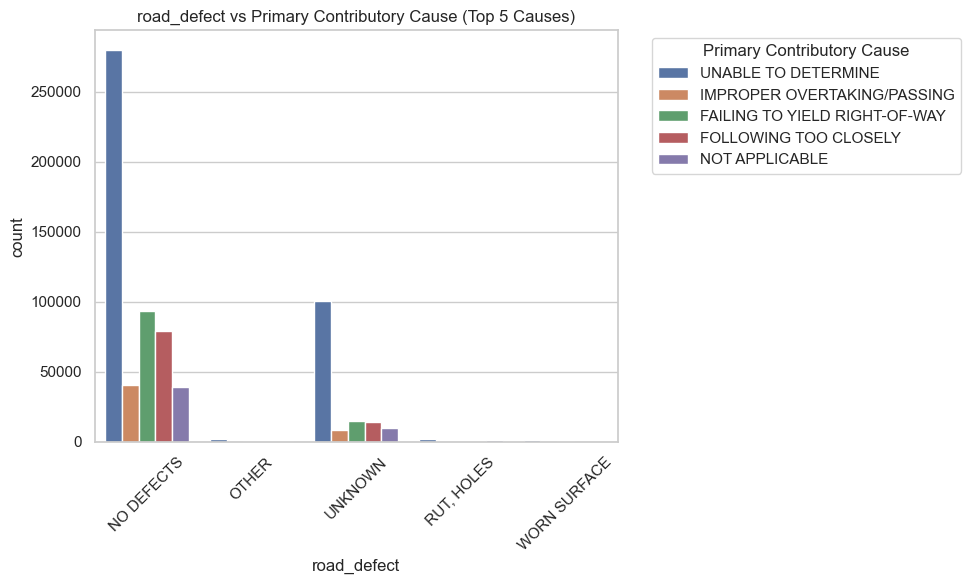

In [20]:
# Select categorical columns
cat_cols = [
    'device_condition', 
    'weather_condition',
    'lighting_condition', 
    'first_crash_type',
    'road_defect'
]

# Get top 5 most frequent primary contributory causes
top5_causes = df['prim_contributory_cause'].value_counts().nlargest(5).index

# Filter dataset to only include those top 10 causes
df_top = df[df['prim_contributory_cause'].isin(top5_causes)]

# Loop through selected categorical variables
for col in cat_cols:
    plt.figure(figsize=(10,6))
    # Limit to top 5 most common categories in each variable to avoid clutter
    top5 = df_top[col].value_counts().nlargest(5).index
    sns.countplot(
        data=df_top[df_top[col].isin(top5)], 
        x=col, 
        hue='prim_contributory_cause'
    )
    plt.title(f'{col} vs Primary Contributory Cause (Top 5 Causes)')
    plt.xticks(rotation=45)
    plt.legend(title='Primary Contributory Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

`This section explains the above countplots`

**1. Device Condition vs Primary Contributory Cause**
This graph helps find out whether device condition like: traffic signals or vehicle systems, influences the type of crash cause. It suggests that lack of controls may lead to uncertainty in determining cause.
- "NO CONTROLS" has the highest incident count across all causes, especially for "UNABLE TO DETERMINE" and "NOT APPLICABLE".

**2. Weather Condition vs Primary Contributory Cause**
This graph shows that most crashes happen in good weather, likely due to higher traffic volume. It challenges assumptions that bad weather is the primary risk factor and highlights the importance of driver behavior.
- CLEAR weather has the highest number of incidents, especially for "UNABLE TO DETERMINE".

**3. Lighting Condition vs Primary Contributory Cause**
Most crashes occur during daylight, again likely due to traffic volume. This suggests that visibility alone isn’t the dominant factor driver attention matters more.
- DAYLIGHT has the highest incident count, especially for "UNABLE TO DETERMINE".

**4. First Crash Type vs Primary Contributory Cause**
This graph reveals how crash type correlates with driver behavior.
- REAR END crashes dominate, especially due to "FOLLOWING TOO CLOSELY".

**5. Road Defect vs Primary Contributory Cause**
Most crashes occur on roads without reported defects, suggesting that infrastructure isn’t always the root cause. However, the presence of "UNKNOWN" data points to gaps in reporting that could mask true correlations.
- NO DEFECTS and UNKNOWN dominate, especially for "UNABLE TO DETERMINE".


### 5.2.2 `Categorical Features vs Primary Contributory Cause`

Let's compare different numerical variables to the top 5 primary contributary causes using Kernel Density Estimation plots

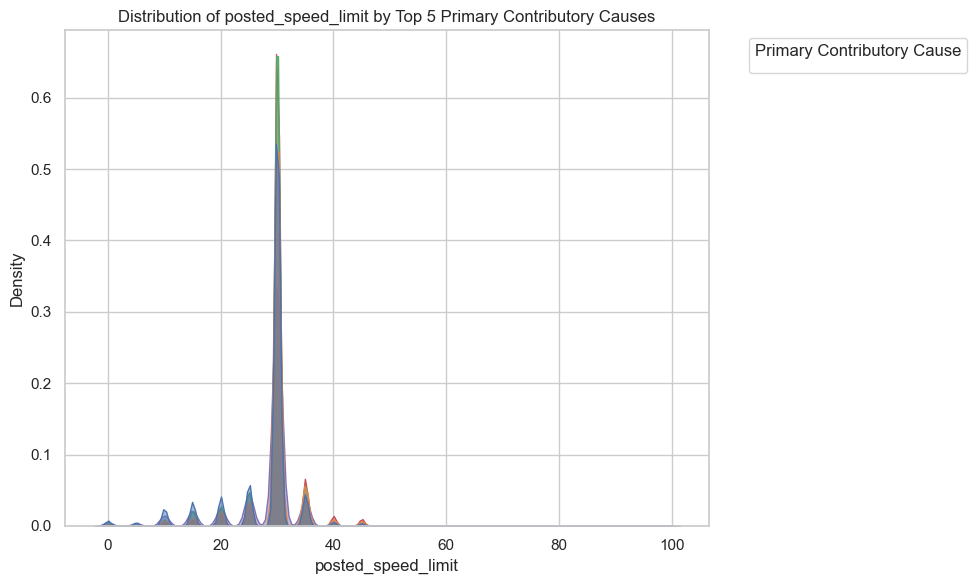

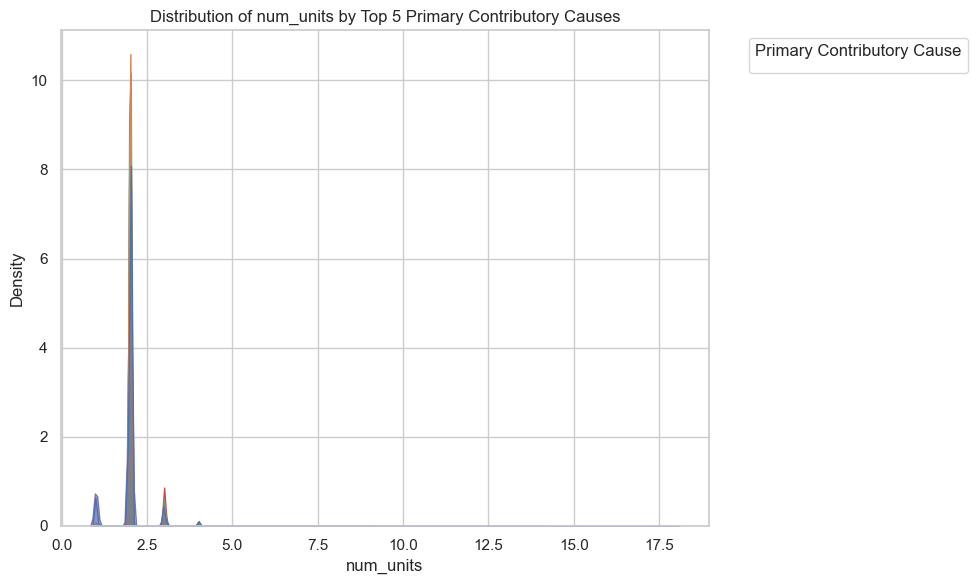

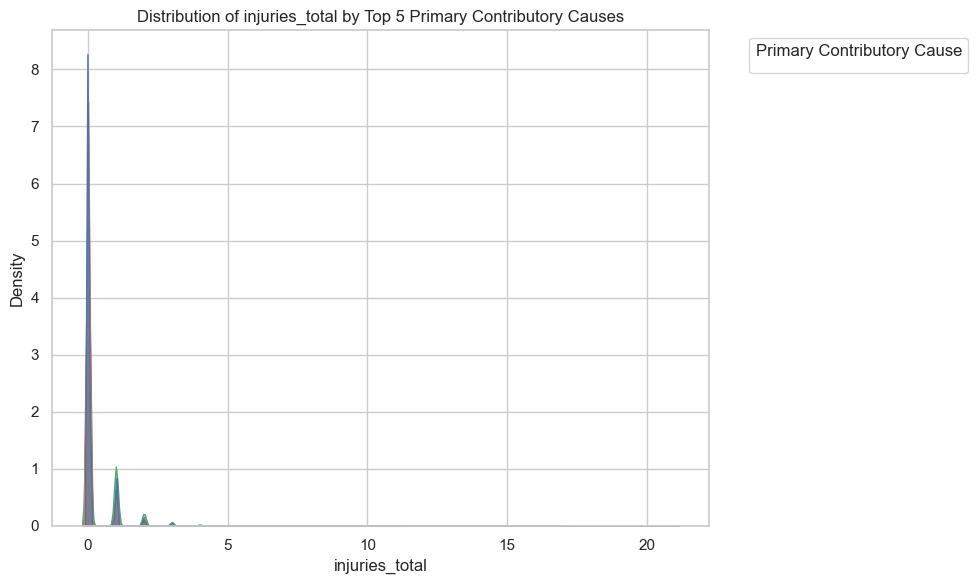

In [21]:
# Select numeric columns
numeric_cols = ['posted_speed_limit', 'num_units', 'injuries_total']

# Get top 5 causes to avoid clutter
top5_causes = df['prim_contributory_cause'].value_counts().nlargest(5).index
df_top = df[df['prim_contributory_cause'].isin(top5_causes)]

# KDE plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.kdeplot(
        data=df_top,
        x=col,
        hue='prim_contributory_cause',
        fill=True,
        common_norm=False,
        alpha=0.5
    )
    plt.title(f'Distribution of {col} by Top 5 Primary Contributory Causes')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Primary Contributory Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

`This section explains the above KDE plots`

**1. Posted Speed Limit vs Primary Contributory Cause**
This plot helps identify which speed zones are most prone to incidents and whether certain causes are more prevalent at specific speeds.
- There's a strong peak around 30 mph, suggesting most incidents occur at this speed.

**2. Number of Units vs Primary Contributory Cause**
This plot reveals how number of units varies by cause. It’s useful for understanding whether certain behaviors tend to involve more vehicles.
-The sharp peak around  2 means the vast majority of crashes involve two units, which is typically two cars colliding.

**3. Total Injuries vs Primary Contributory Cause**
This plot helps assess the severity of incidents by cause.
- Most incidents result in zero or very few injuries, with density sharply concentrated near 0.

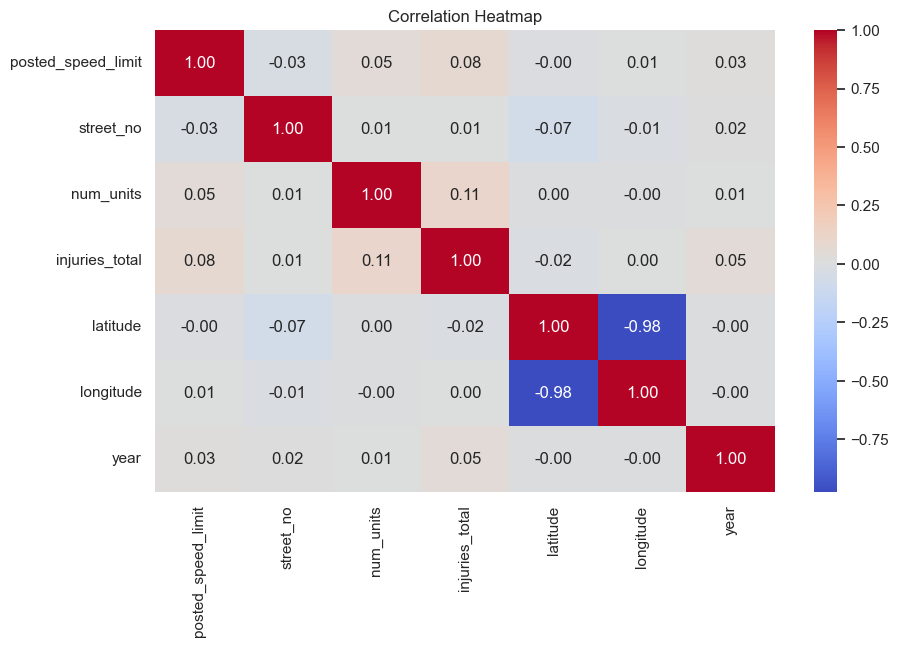

In [22]:
# plotting correlation heatmap for numeric columns only
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
#Generating a unique string key by combining Latitude and Longitude
df['Location_Key'] = df['latitude'].astype(str) + ',' + df['longitude'].astype(str)


locations_df = df.groupby('Location_Key').size().reset_index(name='Number_of_Crashes')

sorted_locations = locations_df.sort_values(
    by='Number_of_Crashes',
    ascending=False
)

#Selecting the top 10 rows
top_10_crashes = sorted_locations.head(10)

print("Top 10 Locations with the Highest Number of Crashes:")
print(top_10_crashes)

Top 10 Locations with the Highest Number of Crashes:
                        Location_Key  Number_of_Crashes
310711   41.976201139,-87.9053091251               1610
211419  41.9009589191,-87.6199281737                884
49684    41.7514606032,-87.585971993                686
95513   41.7914202821,-87.5801477687                685
25726    41.722257273,-87.5852755651                534
52912   41.7546601244,-87.7413847586                439
178268  41.8808560477,-87.6176358918                393
93591   41.7893293233,-87.7416456442                384
205390  41.8968049724,-87.6170274232                378
211156   41.900752974,-87.6242349998                366


In [24]:
!pip install geopy

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time

# --- 1. Data Initialization 
data = {
    'Location_Key': [
        '41.976201139,-87.9053091251',
        '41.9009589191,-87.6199281737',
        '41.7514606032,-87.585971993',
        '41.7914202821,-87.5801477687',
        '41.722257273,-87.5852755651',
        '41.7546601244,-87.7413847586',
        '41.8808560477,-87.6176358918',
        '41.7893293233,-87.7416456442',
        '41.8968049724,-87.6170274232',
        '41.900752974,-87.6242349998'
    ],
   
  
    'Number_of_Crashes': [1610, 884, 686, 685, 534, 439, 393, 384, 378, 366]
}
top_locations_df = pd.DataFrame(data)

# Defining the Reverse Geocoding Function ---

# Initializing geocoder (using OpenStreetMap Nominatim, it requires a user_agent)
geolocator = Nominatim(user_agent="accident_analysis_project")

# Defining a function to look up the location name from the coordinate key
def get_location_name(coord_key):
    try:
        # 1. Split the key into latitude and longitude
        lat, lon = map(float, coord_key.split(','))

        # 2. Perform the reverse geocoding lookup
        # We use a short timeout to prevent the call from hanging indefinitely
        location = geolocator.reverse((lat, lon), timeout=5)

        # 3. Return the address, using .address for the full string
        if location:
            return location.address
        else:
            return 'Address Not Found'
    except Exception as e:
        # Catch errors like connection timeouts or invalid coordinates
        return f'Geocoding Failed: {e}'

# Wrap the function in RateLimiter to avoid overwhelming the external service
# Nominatim policy requires a delay between requests

geocode_limited = RateLimiter(get_location_name, min_delay_seconds=1.5)

#  Apply the Function to the DataFrame ---

start_time = time.time()

# Apply the rate-limited function to the Location_Key column
top_locations_df['Generated_Location_Name'] = top_locations_df['Location_Key'].apply(geocode_limited)

end_time = time.time()
#PRINTING RESUTS
# Display the key, the new generated name, and the crash count
print(top_locations_df[['Generated_Location_Name', 'Number_of_Crashes', 'Location_Key']])

                             Generated_Location_Name  Number_of_Crashes  \
0  O'Hare International Airport, 10000, Thorndale...               1610   
1  East Lake Shore Drive, Magnificent Mile, Near ...                884   
2  East 79th Street, South Shore, Chicago, Hyde P...                686   
3  South DuSable Lake Shore Drive, East Hyde Park...                685   
4  Stony Island Expressway, South Deering, Chicag...                534   
5  Mattress Firm, 7561, South Cicero Avenue, West...                439   
6  East Monroe Drive, Lakeshore East, Jewelers Ro...                393   
7  5696, South Cicero Avenue, Garfield Ridge, Chi...                384   
8  Arthur Rubloff Building, 750, North Lake Shore...                378   
9  One Magnificent Mile, 940-980, North Michigan ...                366   

                   Location_Key  
0   41.976201139,-87.9053091251  
1  41.9009589191,-87.6199281737  
2   41.7514606032,-87.585971993  
3  41.7914202821,-87.5801477687  
4   

In [25]:
#FEATURE EXTRACTION hour, day , month
import calendar

df['crash_hour'] = df['crash_date'].dt.hour
df['crash_day_of_week'] = df['crash_date'].dt.day_name()
df['crash_month'] = df['crash_date'].dt.month_name()

# Ensures the days and months are plotted in calendar order
day_order = list(calendar.day_name)
month_order = list(calendar.month_name)[1:]
sns.set_style("whitegrid")

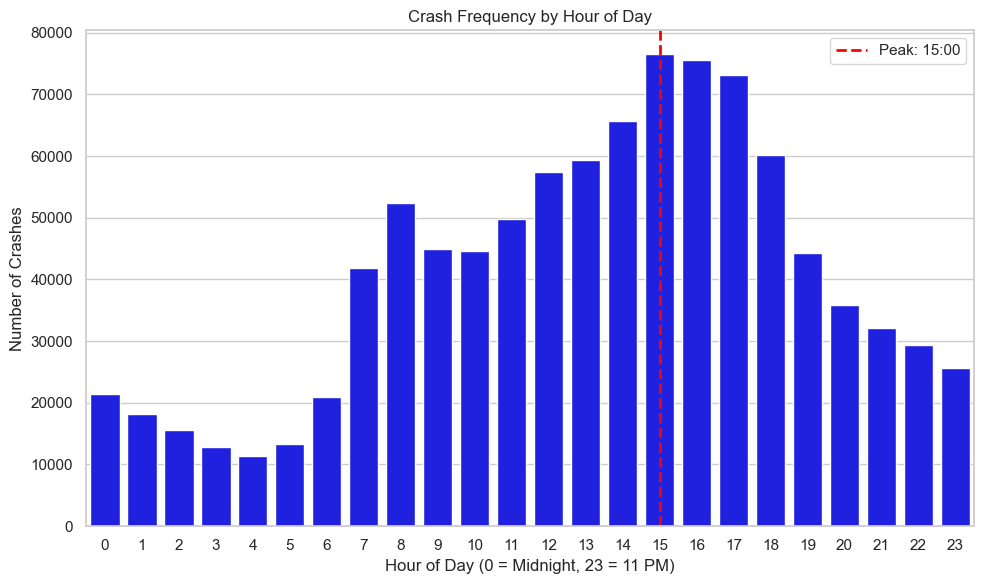

In [26]:
#Time of Day (Hour)
hour_counts = df['crash_hour'].value_counts().sort_index()
peak_hour = hour_counts.idxmax()

plt.figure(figsize=(10, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, color='blue')
plt.title('Crash Frequency by Hour of Day')
plt.xlabel('Hour of Day (0 = Midnight, 23 = 11 PM)')
plt.ylabel('Number of Crashes')
plt.xticks(np.arange(0, 24, 1))
# Highlight the peak hour
plt.axvline(x=peak_hour, color='red', linestyle='--', linewidth=2, label=f'Peak: {peak_hour:02d}:00')
plt.legend()
plt.tight_layout()
plt.show() # Display the plot

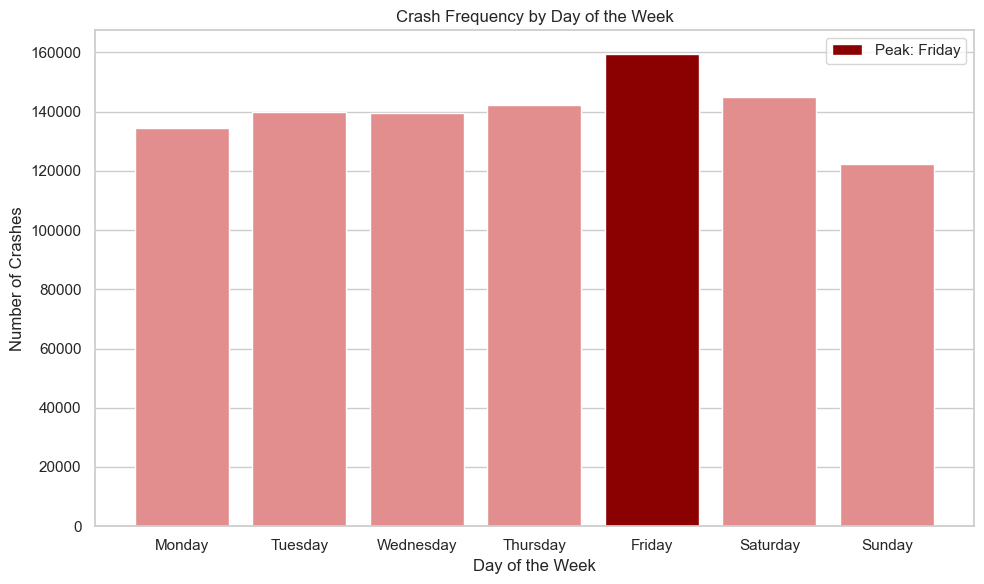

In [27]:
# Day of the Week
day_counts = df['crash_day_of_week'].value_counts().reindex(day_order)
peak_day = day_counts.idxmax()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, color='lightcoral')
plt.title('Crash Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
# Highlight the peak day
plt.bar(peak_day, day_counts[peak_day], color='darkred', label=f'Peak: {peak_day}')
plt.legend()
plt.tight_layout()
plt.show() # Display the plot

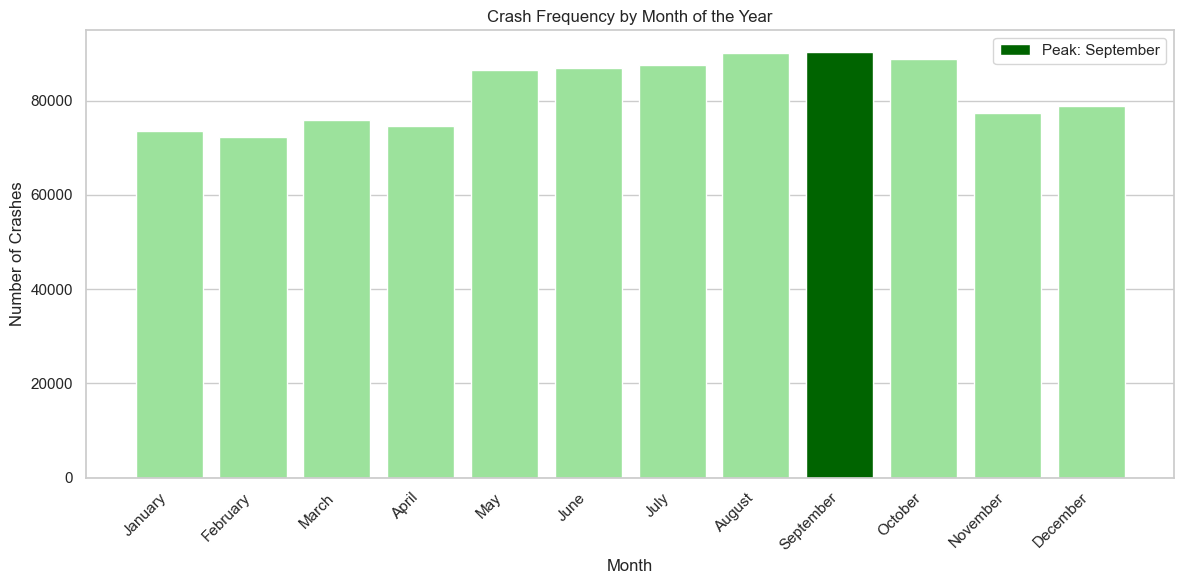

In [28]:
# 4C. Time of the Year (Month)
month_counts = df['crash_month'].value_counts().reindex(month_order)
peak_month = month_counts.idxmax()

plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, color='lightgreen')
plt.title('Crash Frequency by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
# Highlight the peak month
plt.bar(peak_month, month_counts[peak_month], color='darkgreen', label=f'Peak: {peak_month}')
plt.legend()
plt.tight_layout()
plt.show() # Display the plot

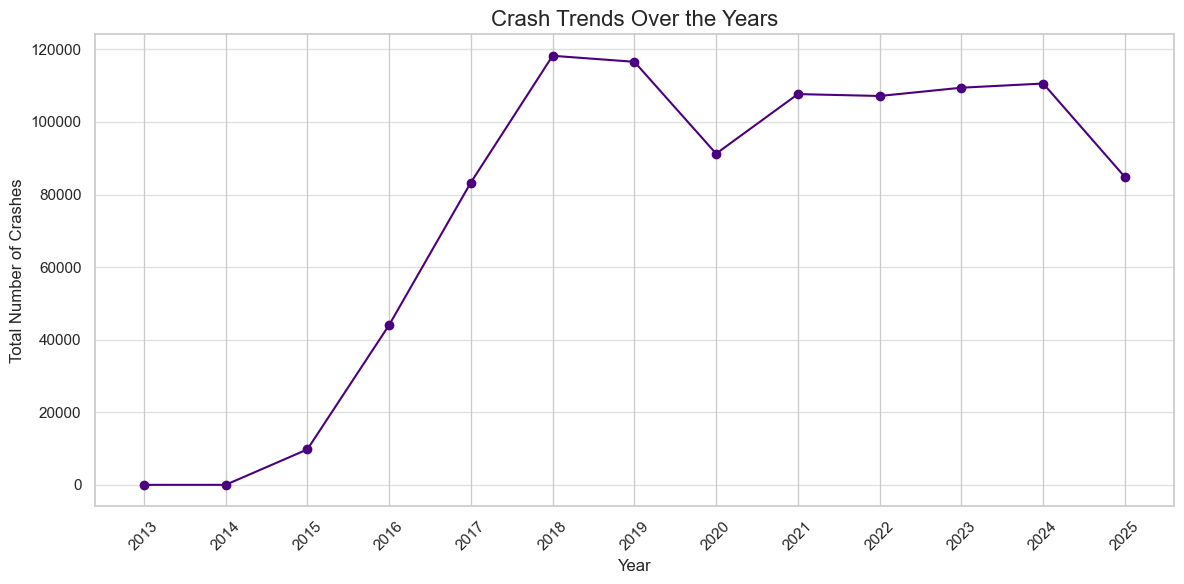

Total years analyzed: 13 (from 2013 to 2025)




In [29]:
df['crash_year'] = df['crash_date'].dt.year

year_counts = df['crash_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
# Create the line plot
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='indigo')
plt.title('Crash Trends Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Crashes', fontsize=12)
# Ensure all years are labeled on the x-axis
plt.xticks(year_counts.index, rotation=45) 
plt.grid(axis='y', alpha=0.6)
plt.tight_layout()
plt.show() 
print(f"Total years analyzed: {len(year_counts)} (from {year_counts.index.min()} to {year_counts.index.max()})")
print("\n" + "="*40 + "\n")

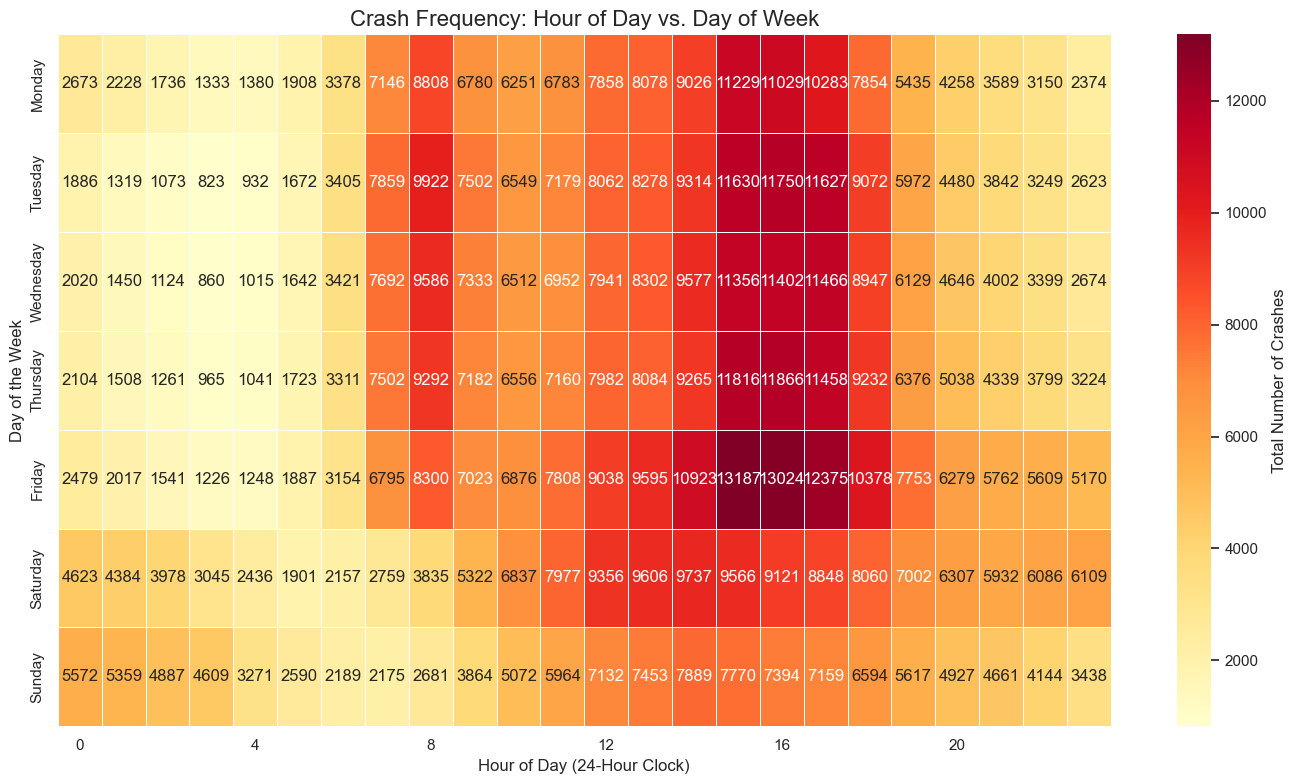


--- Top 5 Peak Hour/Day Combinations
    crash_day_of_week  crash_hour  crash_count
15             Friday          15        13187
16             Friday          16        13024
17             Friday          17        12375
112          Thursday          16        11866
111          Thursday          15        11816


In [30]:
day_order = list(calendar.day_name)
hour_order = list(range(24)) # 0 to 23
# --- 3. Aggregate Data for Heatmap ---
# Count crashes for every combination of Day and Hour
heatmap_data = df.groupby(['crash_day_of_week', 'crash_hour']).size().reset_index(name='crash_count')

# Pivot the table to create the matrix format required for a heatmap
crash_matrix = heatmap_data.pivot_table(
    index='crash_day_of_week', 
    columns='crash_hour', 
    values='crash_count'
)

# Reindex to ensure the days and hours are in the correct sequential order
crash_matrix = crash_matrix.reindex(day_order, axis=0)
crash_matrix = crash_matrix.reindex(hour_order, axis=1)

# --- 4. Plot the Heatmap ---
plt.figure(figsize=(14, 8))
sns.heatmap(
    crash_matrix, 
    cmap="YlOrRd",    # Yellow-Orange-Red color map for intensity
    annot=True,       # Show crash counts on the map
    fmt='g',          # Format as a general number
    linewidths=.5,    # Add slight lines between cells
    cbar_kws={'label': 'Total Number of Crashes'}
)

plt.title('Crash Frequency: Hour of Day vs. Day of Week', fontsize=16)
plt.xlabel('Hour of Day (24-Hour Clock)', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)

# Adjust X-tick labels for better readability
plt.xticks(ticks=np.arange(0.5, 24.5, 4), labels=np.arange(0, 24, 4))

plt.tight_layout()
#plt.savefig('heatmap_crash_frequency.png')
#plt.close()
plt.show()

#print("Heatmap generated and saved as 'heatmap_crash_frequency.png'.")
print("\n--- Top 5 Peak Hour/Day Combinations")
print(heatmap_data.sort_values(by='crash_count', ascending=False).head())

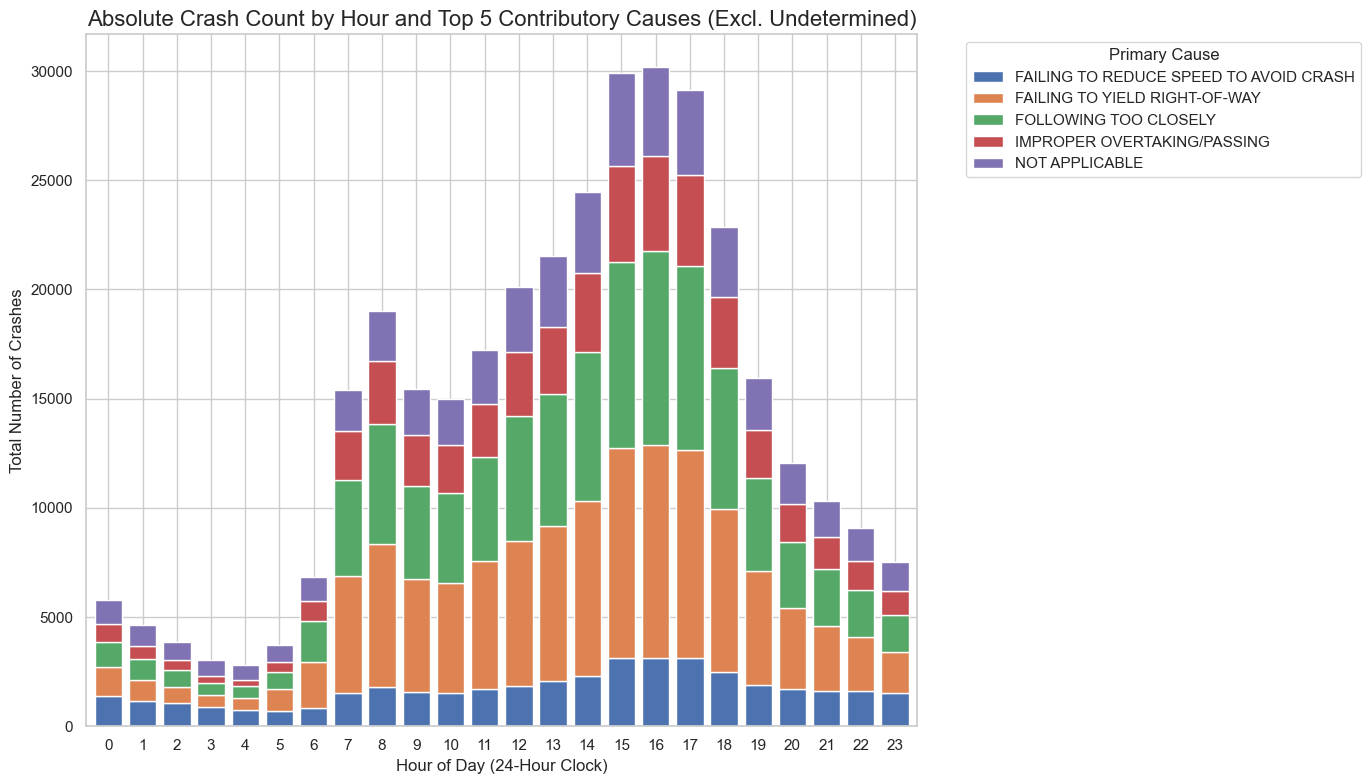

<Axes: xlabel='crash_hour'>

In [31]:

sns.set_style("whitegrid")

# --- 1. Clean Data: Remove 'UNABLE TO DETERMINE' ---
CAUSE_TO_REMOVE = 'UNABLE TO DETERMINE'
df_cleaned = df[df['prim_contributory_cause'] != CAUSE_TO_REMOVE].copy()

# We calculate the top 5 causes 
TOP_N = 5
top_causes = df_cleaned['prim_contributory_cause'].value_counts().nlargest(TOP_N).index.tolist()

# Aggregate data: Group by Hour and Top Cause, then count
cause_by_hour = df_cleaned[df_cleaned['prim_contributory_cause'].isin(top_causes)].groupby(
    ['crash_hour', 'prim_contributory_cause']
).size().unstack(fill_value=0)

# Reindex to include all 24 hours (0 to 23)
hour_order = list(range(24))
cause_by_hour = cause_by_hour.reindex(hour_order, fill_value=0)


plt.figure(figsize=(14, 8))

# Plot the standard stacked bar chart
cause_by_hour.plot(
    kind='bar', 
    stacked=True, 
    ax=plt.gca(), # Use current axes
    legend=True,
    width=0.8
)

plt.title(f'Absolute Crash Count by Hour and Top {TOP_N} Contributory Causes (Excl. Undetermined)', fontsize=16)
plt.xlabel('Hour of Day (24-Hour Clock)', fontsize=12)
plt.ylabel('Total Number of Crashes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Primary Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate the proportional data
# 1. Sum crashes across all causes for each hour
cause_sum_per_hour = cause_by_hour.sum(axis=1)

# 2. Divide each cell by the sum for that row to get proportion
cause_proportions = cause_by_hour.div(cause_sum_per_hour, axis=0).fillna(0) # Fill NaN with 0 for hours with no crashes

plt.figure(figsize=(14, 8))

# Plot the 100% stacked bar chart
cause_proportions.plot(
    kind='bar', 
    stacked=True, 
    ax=plt.gca(), # Use current axes
    legend=True,
    width=0.8
)



In [32]:
# creating a copy of our dataframe to avoid modifying the original dataframe
df1 = df.copy()

In [33]:
# droping the crash_date and crash_time columns as they are not needed for modeling
df2 = df1.drop(columns=['crash_date','latitude','longitude','location'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982961 entries, 0 to 992594
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   posted_speed_limit       982961 non-null  int64  
 1   traffic_control_device   982961 non-null  object 
 2   device_condition         982961 non-null  object 
 3   weather_condition        982961 non-null  object 
 4   lighting_condition       982961 non-null  object 
 5   first_crash_type         982961 non-null  object 
 6   trafficway_type          982961 non-null  object 
 7   alignment                982961 non-null  object 
 8   road_defect              982961 non-null  object 
 9   crash_type               982961 non-null  object 
 10  damage                   982961 non-null  object 
 11  date_police_notified     982961 non-null  object 
 12  prim_contributory_cause  982961 non-null  object 
 13  sec_contributory_cause   982961 non-null  object 
 14  street_no

In [34]:
df2['prim_contributory_cause'].value_counts()


prim_contributory_cause
UNABLE TO DETERMINE                                                                 386295
FAILING TO YIELD RIGHT-OF-WAY                                                       109499
FOLLOWING TOO CLOSELY                                                                94370
NOT APPLICABLE                                                                       50925
IMPROPER OVERTAKING/PASSING                                                          49601
FAILING TO REDUCE SPEED TO AVOID CRASH                                               41339
IMPROPER BACKING                                                                     37321
IMPROPER LANE USAGE                                                                  34702
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  33935
IMPROPER TURNING/NO SIGNAL                                                           33159
DISREGARDING TRAFFIC SIGNALS                                      

In [35]:
cause_groups = {
    # 1. Right-of-Way & Speed Violations (High Volume, Focus on Flow/Priority)
    'FAILING TO YIELD RIGHT-OF-WAY': 'Speed & Right-of-Way Failure',
    'FOLLOWING TOO CLOSELY': 'Speed & Right-of-Way Failure',
    'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Speed & Right-of-Way Failure',
    'EXCEEDING SAFE SPEED FOR CONDITIONS': 'Speed & Right-of-Way Failure',
    'EXCEEDING AUTHORIZED SPEED LIMIT': 'Speed & Right-of-Way Failure',
    'TURNING RIGHT ON RED': 'Speed & Right-of-Way Failure',

    # 2. Basic Maneuver Errors (Skill, Positioning, and Attention)
    'IMPROPER OVERTAKING/PASSING': 'Maneuver & Positioning Error',
    'IMPROPER BACKING': 'Maneuver & Positioning Error',
    'IMPROPER LANE USAGE': 'Maneuver & Positioning Error',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Maneuver & Positioning Error',
    'IMPROPER TURNING/NO SIGNAL': 'Maneuver & Positioning Error',
    'DRIVING ON WRONG SIDE/WRONG WAY': 'Maneuver & Positioning Error',

    # 3. Disregard of Traffic Controls/Signs (Deliberate Violation)
    'DISREGARDING TRAFFIC SIGNALS': 'Disregard Traffic Controls',
    'DISREGARDING STOP SIGN': 'Disregard Traffic Controls',
    'DISREGARDING OTHER TRAFFIC SIGNS': 'Disregard Traffic Controls',
    'DISREGARDING ROAD MARKINGS': 'Disregard Traffic Controls',
    'DISREGARDING YIELD SIGN': 'Disregard Traffic Controls',
    'PASSING STOPPED SCHOOL BUS': 'Disregard Traffic Controls',

    # 4. Impairment & Reckless Driving
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Impairment & Recklessness',
    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'Impairment & Recklessness',
    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'Impairment & Recklessness',
    'PHYSICAL CONDITION OF DRIVER': 'Impairment & Recklessness',

    # 5. Distraction & Visibility Issues
    'DISTRACTION - FROM INSIDE VEHICLE': 'Distraction & Visibility',
    'DISTRACTION - FROM OUTSIDE VEHICLE': 'Distraction & Visibility',
    'CELL PHONE USE OTHER THAN TEXTING': 'Distraction & Visibility',
    'TEXTING': 'Distraction & Visibility',
    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 'Distraction & Visibility',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'Distraction & Visibility',

    # 6. External, Environmental & Mechanical Factors
    'WEATHER': 'External/Environmental/Mechanical',
    'EQUIPMENT - VEHICLE CONDITION': 'External/Environmental/Mechanical',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'External/Environmental/Mechanical',
    'ROAD CONSTRUCTION/MAINTENANCE': 'External/Environmental/Mechanical',
    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 'External/Environmental/Mechanical',
    'ANIMAL': 'External/Environmental/Mechanical',
    'RELATED TO BUS STOP': 'External/Environmental/Mechanical',
    'OBSTRUCTED CROSSWALKS': 'External/Environmental/Mechanical',
    'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'External/Environmental/Mechanical',
    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'External/Environmental/Mechanical',
    
    # 7. Unclassified/Administrative (Left separate as requested)
    'NOT APPLICABLE': 'Unclassified/Administrative',
    'UNABLE TO DETERMINE': 'UNABLE TO DETERMINE' 
}

df2['Cause_Group'] = df2['prim_contributory_cause'].map(cause_groups)
print(df2['Cause_Group'].value_counts())
print(df2.columns)


Cause_Group
UNABLE TO DETERMINE                  386295
Speed & Right-of-Way Failure         249586
Maneuver & Positioning Error         194124
Unclassified/Administrative           50925
Disregard Traffic Controls            33226
External/Environmental/Mechanical     27399
Impairment & Recklessness             23307
Distraction & Visibility              18099
Name: count, dtype: int64
Index(['posted_speed_limit', 'traffic_control_device', 'device_condition',
       'weather_condition', 'lighting_condition', 'first_crash_type',
       'trafficway_type', 'alignment', 'road_defect', 'crash_type', 'damage',
       'date_police_notified', 'prim_contributory_cause',
       'sec_contributory_cause', 'street_no', 'street_direction',
       'street_name', 'num_units', 'most_severe_injury', 'injuries_total',
       'year', 'Location_Key', 'crash_hour', 'crash_day_of_week',
       'crash_month', 'crash_year', 'Cause_Group'],
      dtype='object')


In [36]:
# label encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df2.select_dtypes(include=['object']).columns:
    df2[col] = le.fit_transform(df2[col])
    
le

LabelEncoder()

In [37]:
df2.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,road_defect,crash_type,...,num_units,most_severe_injury,injuries_total,year,Location_Key,crash_hour,crash_day_of_week,crash_month,crash_year,Cause_Group
0,30,4,3,2,3,8,8,3,1,1,...,2,2,0.0,2025,155300,2,3,10,2025,4
1,30,4,3,2,1,2,8,3,1,0,...,1,2,0.0,2025,80423,1,3,10,2025,6
2,30,16,1,2,1,10,8,3,5,1,...,2,2,0.0,2025,210882,1,3,10,2025,1
3,25,4,3,2,1,2,3,3,1,0,...,1,2,0.0,2025,128958,1,3,10,2025,6
4,35,4,3,2,1,17,8,3,1,0,...,2,2,0.0,2025,75472,1,3,10,2025,4


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982961 entries, 0 to 992594
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   posted_speed_limit       982961 non-null  int64  
 1   traffic_control_device   982961 non-null  int64  
 2   device_condition         982961 non-null  int64  
 3   weather_condition        982961 non-null  int64  
 4   lighting_condition       982961 non-null  int64  
 5   first_crash_type         982961 non-null  int64  
 6   trafficway_type          982961 non-null  int64  
 7   alignment                982961 non-null  int64  
 8   road_defect              982961 non-null  int64  
 9   crash_type               982961 non-null  int64  
 10  damage                   982961 non-null  int64  
 11  date_police_notified     982961 non-null  int64  
 12  prim_contributory_cause  982961 non-null  int64  
 13  sec_contributory_cause   982961 non-null  int64  
 14  street_no

In [39]:
# checking for class imbalance in target variable
df['prim_contributory_cause'].value_counts()


prim_contributory_cause
UNABLE TO DETERMINE                                                                 386295
FAILING TO YIELD RIGHT-OF-WAY                                                       109499
FOLLOWING TOO CLOSELY                                                                94370
NOT APPLICABLE                                                                       50925
IMPROPER OVERTAKING/PASSING                                                          49601
FAILING TO REDUCE SPEED TO AVOID CRASH                                               41339
IMPROPER BACKING                                                                     37321
IMPROPER LANE USAGE                                                                  34702
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  33935
IMPROPER TURNING/NO SIGNAL                                                           33159
DISREGARDING TRAFFIC SIGNALS                                      

In [40]:
# !pip install xgboost
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from imblearn.pipeline import Pipeline as ImPipeline


In [43]:
# performing class balancing using SMOTE in attempt to improve model performance for our df

from imblearn.over_sampling import RandomOverSampler

X = df2.drop('prim_contributory_cause', axis=1)
y = df2['prim_contributory_cause']
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)






In [44]:
# separating our target variable and features
X_resampled = df2.drop('prim_contributory_cause', axis=1)
y_resampled = df2['prim_contributory_cause']

In [45]:
# Split into training + temp (temp will later be split into val + test)
X_resampled_train, X_resampled_temp, y_resampled_train, y_resampled_temp = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

In [46]:
# spliting our temp set into validation and test sets
X_resampled_val, X_resampled_test, y_resampled_val, y_resampled_test = train_test_split(
    X_resampled_temp, y_resampled_temp, test_size=0.5, random_state=42, stratify=y_resampled_temp
)

In [47]:
# checking the shape of our new training and temp sets
X_resampled_train.shape, X_resampled_temp.shape

((688072, 26), (294889, 26))

In [51]:
# Training the model using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
# Fitting the model
dt_clf.fit(X_resampled_train, y_resampled_train)
# Making predictions
y_pred = clf.predict(X_resampled_test)
# Evaluating the model
print('Decision Tree accuracy:', accuracy_score(y_resampled_test, y_pred))
print('\nClassification report:\n', classification_report(y_resampled_test, y_pred))
print('\nConfusion matrix:\n', confusion_matrix(y_resampled_test, y_pred))


Decision Tree accuracy: 0.7828071484282275

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00       191
           3       0.00      0.00      0.00       309
           4       0.00      0.00      0.00       178
           5       0.80      0.97      0.88      1553
           6       0.90      0.96      0.93      2882
           7       0.00      0.00      0.00        44
           8       0.00      0.00      0.00       989
           9       0.00      0.00      0.00       577
          10       0.00      0.00      0.00        71
          11       0.00      0.00      0.00       811
          12       0.00      0.00      0.00      5091
          13       0.00      0.00      0.00       894
          14       0.00      0.00      0.00       261
          15       0.00      0.00      0.00       294
          16 

In [52]:
# cross validation for decision tree model
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt_clf, X_resampled, y_resampled, cv=cv, scoring='f1_weighted')
print("Cross-Validation Weighted F1 Scores:", cv_scores)


Cross-Validation Weighted F1 Scores: [0.72955586 0.72886947 0.72906635 0.72931836 0.72944991]


In [53]:
# checking for precision, recall and f1 score for decision tree model
y_pred = dt_clf.predict(X_resampled_test)
precision = precision_score(y_resampled_test, y_pred, average='weighted')   
recall = recall_score(y_resampled_test, y_pred, average='weighted')
f1 = f1_score(y_resampled_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.6975574718288855
Recall: 0.7828071484282275
F1 Score: 0.7293494665867248


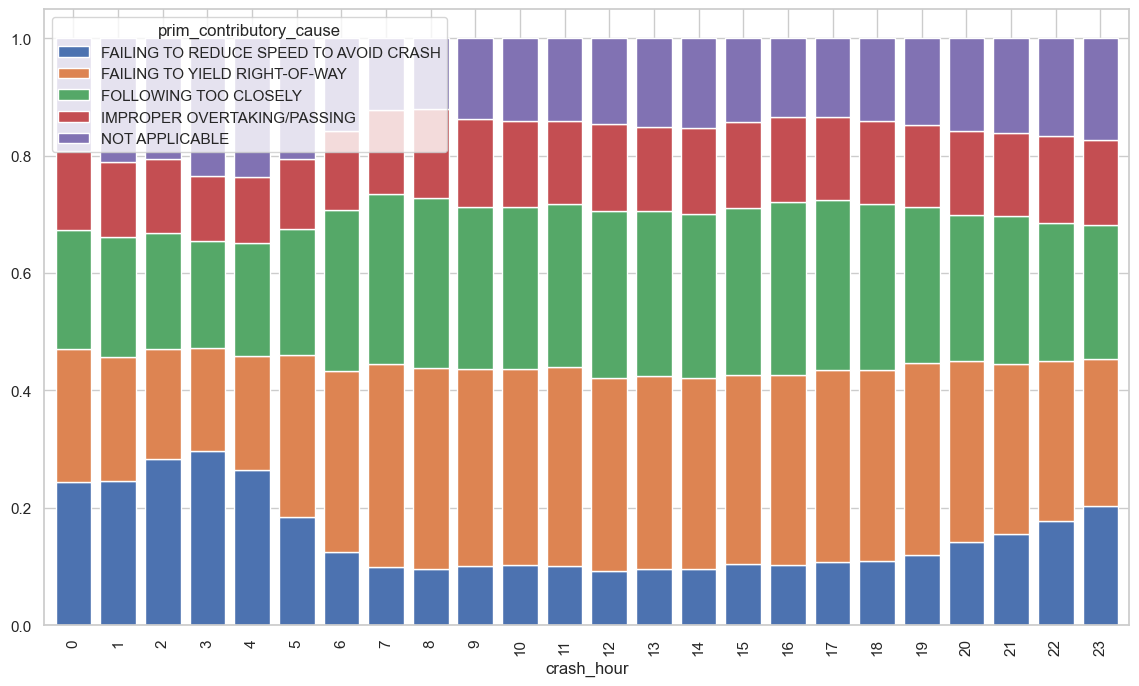

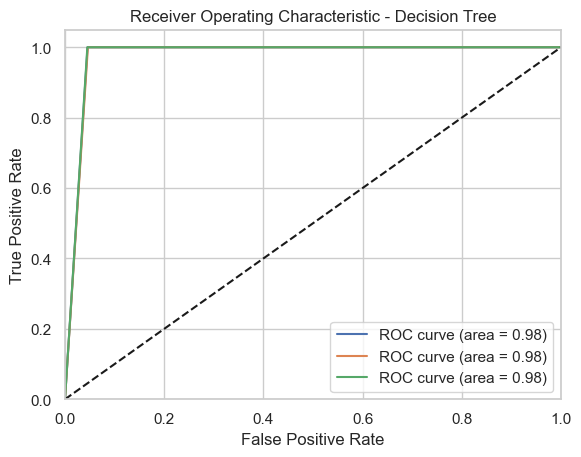

In [56]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve

# Binarize the output
y_test_bin = label_binarize(y_resampled_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities from the decision tree model
y_prob = dt_clf.predict_proba(X_resampled_test)  # <--- This is what was missing!

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()


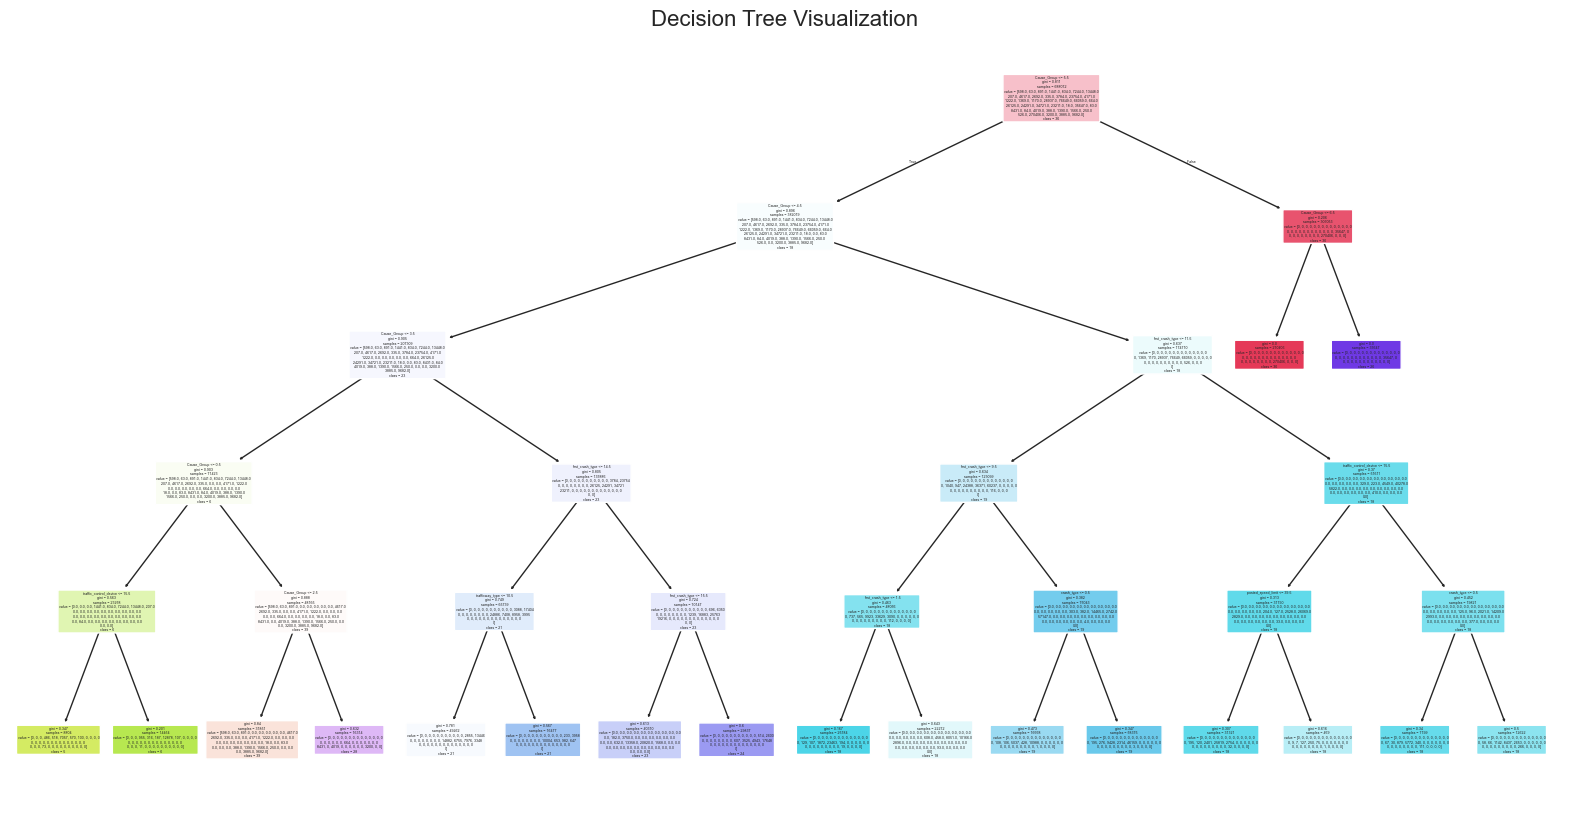

In [57]:
# ploting the decision tree in clear format
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_clf, filled=True, feature_names=X_resampled.columns, class_names=[str(i) for i in dt_clf.classes_], rounded=True)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


In [58]:
# importing random forest libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [59]:
# Random Forest training using the already-defined resampled train/test sets
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf_clf.fit(X_resampled_train, y_resampled_train)
y_pred_rf = rf_clf.predict(X_resampled_test)
# accuracy score for random forest model
print(f"Training Accuracy: {rf_clf.score(X_resampled_train, y_resampled_train)}")
print(f"Testing Accuracy: {rf_clf.score(X_resampled_test, y_resampled_test)}")

Training Accuracy: 0.6172566243067587
Testing Accuracy: 0.6169961680626674


In [60]:
# precision , recall and f1 score for random forest model
precision_rf = precision_score(y_resampled_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_resampled_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_resampled_test, y_pred_rf, average='weighted')
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1 Score:', f1_rf)


Precision: 0.5437550302939876
Recall: 0.6169961680626674
F1 Score: 0.5041901250824075


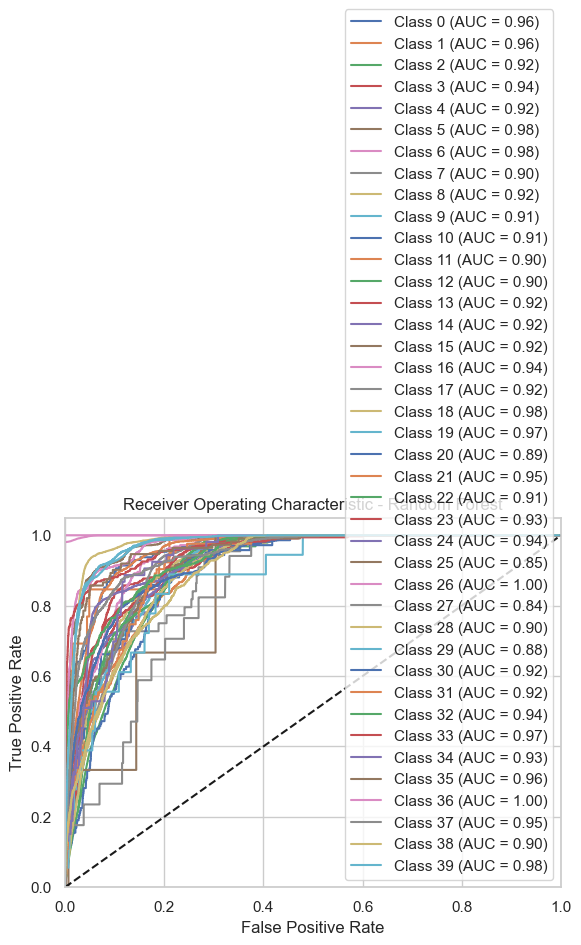

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import label_binarize

# Binarize the output for multi-class ROC
y_test_bin_rf = label_binarize(y_resampled_test, classes=rf_clf.classes_)
n_classes_rf = y_test_bin_rf.shape[1]

# Get predicted probabilities (shape: [n_samples, n_classes])
y_prob_rf = rf_clf.predict_proba(X_resampled_test)

# Compute ROC curve and ROC area for each class
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

for i in range(n_classes_rf):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin_rf[:, i], y_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plotting
plt.figure()
for i in range(n_classes_rf):
    plt.plot(fpr_rf[i], tpr_rf[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc_rf[i]))
    
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()


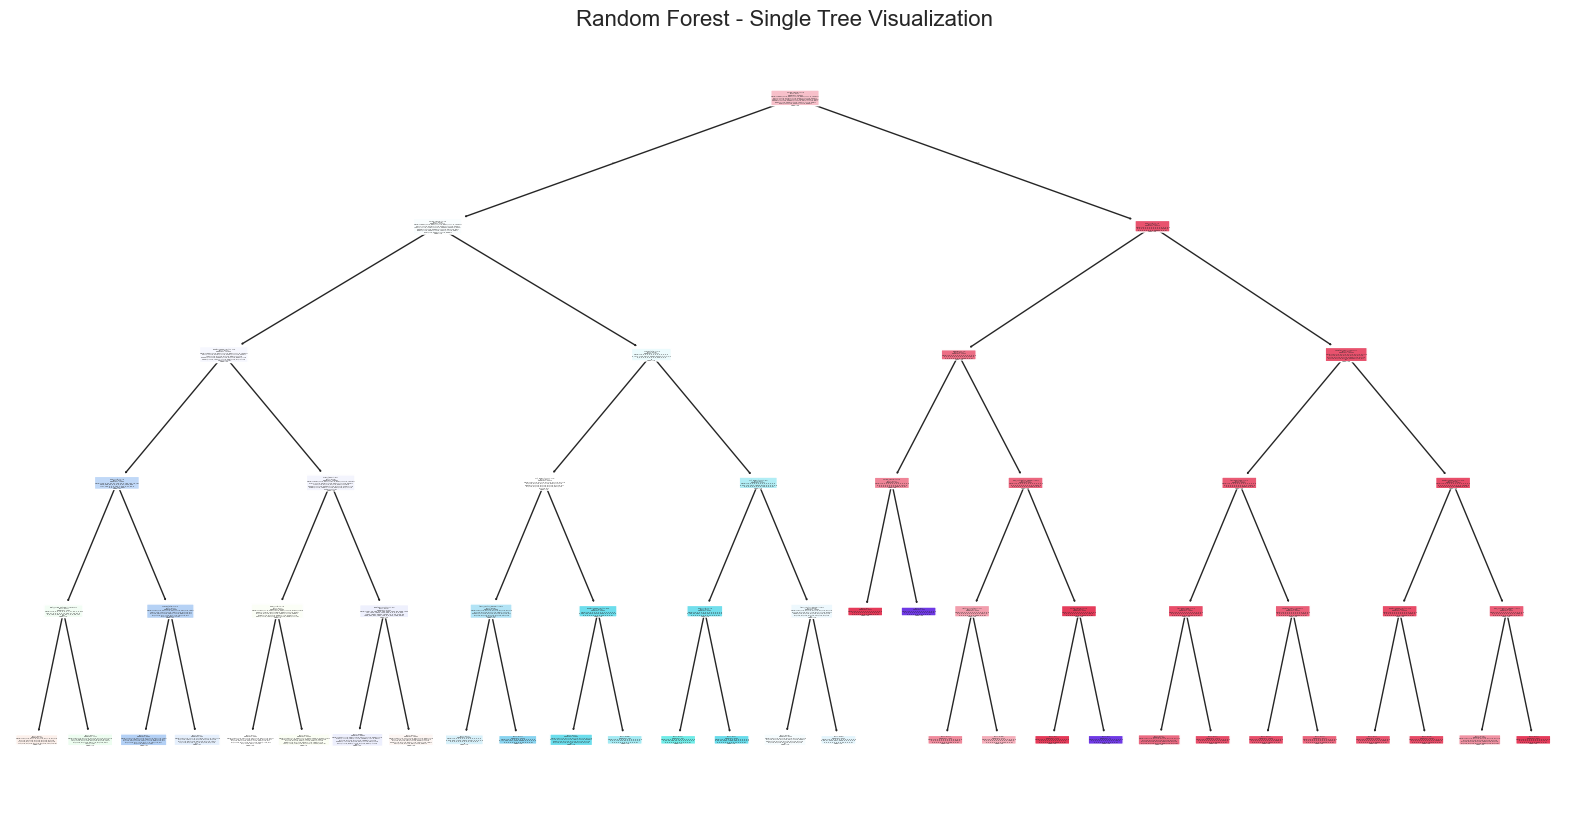

In [63]:
# ploting the random forest model tree
# Plotting one of the trees in the Random Forest
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(rf_clf.estimators_[0], filled=True, feature_names=X_resampled.columns, class_names=[str(i) for i in rf_clf.classes_], rounded=True)
plt.title("Random Forest - Single Tree Visualization", fontsize=16)
plt.show()


In [64]:
# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=14, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_resampled_train, y_resampled_train)
y_pred = xgb_clf.predict(X_resampled_test)
print('XGBoost Classifier accuracy:', accuracy_score(y_resampled_test, y_pred))
print('\nClassification report:\n', classification_report(y_resampled_test, y_pred))


XGBoost Classifier accuracy: 0.8351724371799654

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.52      0.67       128
           1       0.71      0.38      0.50        13
           2       0.34      0.09      0.14       191
           3       0.49      0.18      0.27       309
           4       0.62      0.56      0.59       178
           5       0.91      0.97      0.94      1553
           6       0.91      0.96      0.93      2882
           7       0.50      0.11      0.19        44
           8       0.55      0.72      0.62       989
           9       0.47      0.33      0.39       577
          10       0.00      0.00      0.00        71
          11       0.51      0.34      0.41       811
          12       0.48      0.45      0.46      5091
          13       0.63      0.73      0.68       894
          14       0.42      0.18      0.26       261
          15       0.45      0.13      0.20       294
        

In [65]:
# checking for the model performance on the test set
y_test_pred = xgb_clf.predict(X_resampled_test)
print('Test Set Accuracy:', accuracy_score(y_resampled_test, y_test_pred))



Test Set Accuracy: 0.8351724371799654


In [66]:
# checkiing for the model performance on the validation set
y_val_pred = xgb_clf.predict(X_resampled_val)
print('Validation Set Accuracy:', accuracy_score(y_resampled_val, y_val_pred))


Validation Set Accuracy: 0.8347915140663574


In [67]:
# checking for model performance on the predicted set
y_pred = xgb_clf.predict(X_resampled)
print('Predicted Set Accuracy:', accuracy_score(y_resampled, y_pred))
print('Predicted Set Classification Report:\n', classification_report(y_resampled, y_pred))

Predicted Set Accuracy: 0.8525048297948749
Predicted Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       854
           1       0.95      0.82      0.88        90
           2       0.89      0.32      0.47      1273
           3       0.84      0.35      0.49      2059
           4       0.84      0.76      0.80      1191
           5       0.94      0.98      0.96     10349
           6       0.93      0.98      0.95     19212
           7       0.94      0.62      0.75       295
           8       0.66      0.85      0.74      6595
           9       0.75      0.53      0.62      3846
          10       0.95      0.33      0.49       478
          11       0.60      0.41      0.49      5406
          12       0.52      0.49      0.50     33935
          13       0.74      0.82      0.77      5959
          14       0.79      0.43      0.56      1745
          15       0.75      0.27      0.40      1956
